Liver Disease Prediction

In [132]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

plt.style.use('ggplot')


In [133]:
df=pd.read_csv(r'C:\Users\Pranshu Saini\Desktop\disease-prediction-main\docpat\datasets\Liver.csv',encoding='ISO-8859-1')
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [134]:
column_rename_dict = {
    'Sgot Aspartate Aminotransferase': 'Aspartate_Aminotransferase'
}

df.rename(columns=column_rename_dict, inplace=True)
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [135]:
from sklearn.linear_model import LogisticRegression
input_data =(26.0,0,0.7,0.2,185.0,16.0,22.0,7.3,3.7,1.00
)
#100,12,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1) 

'''(14.36,0.09779,0.08129,0.04781,0.1885,0.05766,0.7886,23.56,0.008462,
0.0146,0.02387,0.01315,0.0198,0.0023,15.11,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259
)'''

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
predictions = svc.predict(input_data_reshaped)
print(predictions)
if (predictions == 0):
  print('B')
else:
  print('M')

[1]
M


In [136]:
df.shape

(30691, 11)


Exploratory Data Analysis

In [137]:
df.isna().sum().sum()

5425

In [138]:
df = df.dropna()
df.isna().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Aspartate_Aminotransferase              0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

Distribution of Numerical Features

In [139]:
df.sample(5)


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
5090,29.0,Female,1.3,0.6,166.0,49.0,42.0,5.6,2.5,0.80,2
3055,16.0,Male,0.6,0.1,186.0,20.0,21.0,6.2,3.3,1.10,2
24182,38.0,Male,1.1,0.5,128.0,20.0,30.0,3.9,1.9,0.95,2
30230,60.0,Female,1.4,0.7,195.0,36.0,16.0,7.9,3.7,0.90,2
20921,56.0,Male,5.0,2.1,103.0,18.0,40.0,5.0,2.1,1.72,1


In [140]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000
mean,44.125046,3.407909,1.541630,290.142021,81.279292,112.102879,6.472605,3.124044,0.943567,1.282790
std,15.971563,6.332486,2.895084,239.595473,181.571537,283.616005,1.081477,0.792329,0.324205,0.450363
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,36.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.700000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [141]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1


df['Result'] = df['Result'].map(partition)

Number of patients that are male:  19478
Number of patients that are female:  7680


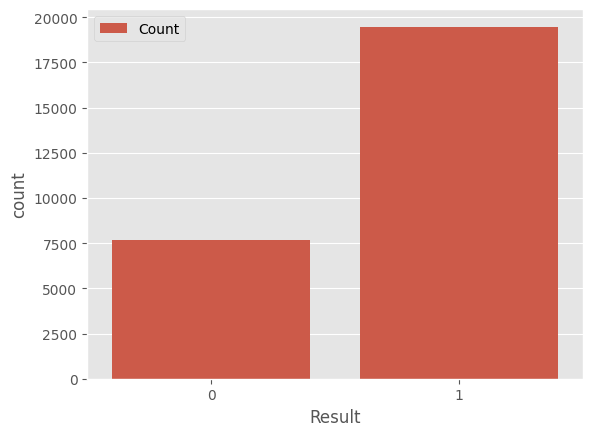

In [142]:

sns.countplot(data=df, x = 'Result', label='Count')

M, F = df['Result'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [160]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender of the patient'] = df['Gender of the patient'].map(partition)

In [161]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,52.0,1,0.9,0.2,116.0,36.0,16.0,6.2,3.2,1.00,0
1,36.0,1,0.7,0.2,188.0,11.0,10.0,5.5,2.3,0.71,0
2,28.0,0,0.5,0.1,162.0,155.0,108.0,8.1,4.0,0.90,1
3,49.0,0,0.7,0.2,188.0,13.0,21.0,6.0,3.2,1.10,0
4,51.0,0,1.0,0.3,75.0,25.0,26.0,5.1,2.9,1.30,1


In [145]:
# Filter rows for each class
class_0 = df[df['Result'] == 0]  # Replace 'target' with your column name
class_1 = df[df['Result'] == 1]

# Downsample class 1 to 10,000 samples
class_1_downsampled = class_1.sample(n=10000, random_state=42)

# Combine the two classes
df = pd.concat([class_0, class_1_downsampled])

# Shuffle the resulting DataFrame to mix the classes
df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)



Number of patients that are male:  10000
Number of patients that are female:  7680


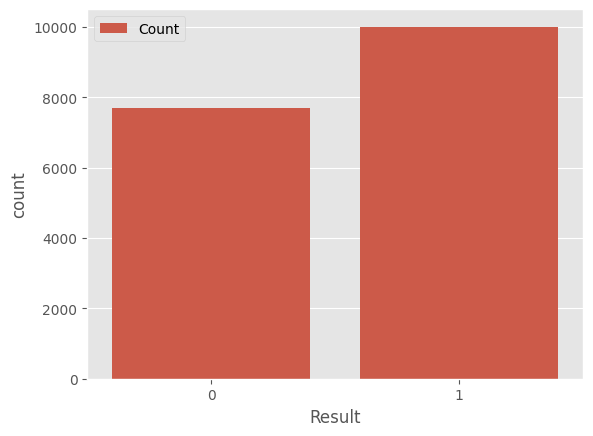

In [146]:

sns.countplot(data=df, x = 'Result', label='Count')

M, F = df['Result'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [147]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,52.0,Female,0.9,0.2,116.0,36.0,16.0,6.2,3.2,1.00,0
1,36.0,Female,0.7,0.2,188.0,11.0,10.0,5.5,2.3,0.71,0
2,28.0,Male,0.5,0.1,162.0,155.0,108.0,8.1,4.0,0.90,1
3,49.0,Male,0.7,0.2,188.0,13.0,21.0,6.0,3.2,1.10,0
4,51.0,Male,1.0,0.3,75.0,25.0,26.0,5.1,2.9,1.30,1


Data Cleaning

In [148]:
df = df.drop_duplicates()
print( df.shape )

(12181, 11)


Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

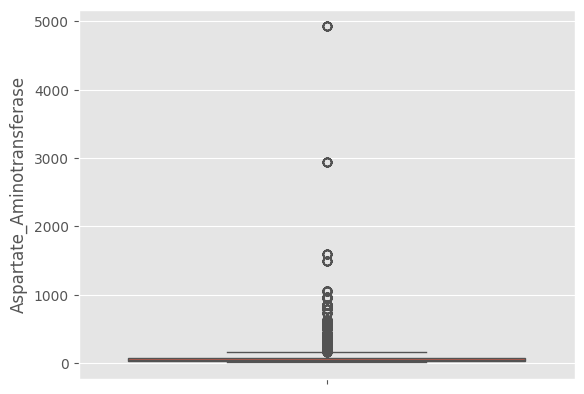

In [149]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [150]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

2987     4929.0
6010     4929.0
6619     4929.0
11615    4929.0
12126    4929.0
Name: Aspartate_Aminotransferase, dtype: float64

In [151]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(12165, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

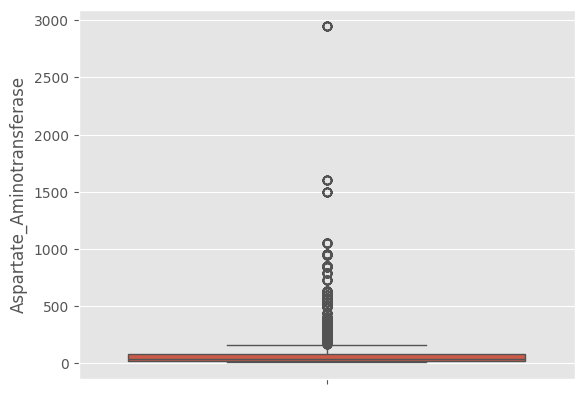

In [152]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [153]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

10996    2946.0
8375     2946.0
5602     2946.0
6813     2946.0
5133     2946.0
Name: Aspartate_Aminotransferase, dtype: float64

In [154]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(12149, 11)

In [155]:
df.isnull().values.any()

False

In [156]:
df=df.dropna(how='any')  
df.shape

(12149, 11)

In [157]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,52.0,Female,0.9,0.2,116.0,36.0,16.0,6.2,3.2,1.00,0
1,36.0,Female,0.7,0.2,188.0,11.0,10.0,5.5,2.3,0.71,0
2,28.0,Male,0.5,0.1,162.0,155.0,108.0,8.1,4.0,0.90,1
3,49.0,Male,0.7,0.2,188.0,13.0,21.0,6.0,3.2,1.10,0
4,51.0,Male,1.0,0.3,75.0,25.0,26.0,5.1,2.9,1.30,1


Machine Learning Models

Data Preparation

In [163]:
# Create separate object for target variable
y = df.Result

# Create separate object for input features
X = df.drop('Result', axis=1)
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=df.Result)
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8504, 10) (3645, 10) (8504,) (3645,)


Data standardization

In [164]:
train_mean = X_train.mean()
train_std = X_train.std()
## Standardize the train data set
X_train = (X_train - train_mean) / train_std
## Check for mean and std dev.
X_train.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,8.504000e+03,8.504000e+03,8.504000e+03,8.504000e+03,8.504000e+03,8.504000e+03,8.504000e+03,8.504000e+03,8.504000e+03,8.504000e+03
mean,-1.215710e-16,1.215710e-16,1.169755e-17,-6.182992e-17,1.932185e-18,-8.982049e-18,-2.548395e-17,-2.197469e-16,-3.843481e-17,-1.478905e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.422689e+00,-6.412252e-01,-4.594191e-01,-4.656438e-01,-9.303106e-01,-4.163797e-01,-4.956979e-01,-3.476604e+00,-2.820396e+00,-2.052873e+00
25%,-7.125996e-01,-6.412252e-01,-3.878698e-01,-4.279415e-01,-4.664464e-01,-3.305702e-01,-4.089980e-01,-6.316850e-01,-6.980597e-01,-7.707068e-01
50%,8.137060e-02,-6.412252e-01,-3.699824e-01,-3.902392e-01,-3.387774e-01,-2.590623e-01,-3.099125e-01,1.024876e-01,-7.384312e-02,1.361914e-01
75%,6.921169e-01,1.559331e+00,-1.374469e-01,-8.862079e-02,3.571851e-02,-8.029253e-02,-6.839148e-02,6.531171e-01,8.000601e-01,4.489149e-01
max,2.829729e+00,1.559331e+00,1.288454e+01,6.924007e+00,7.780974e+00,1.152544e+01,9.350928e+00,2.855635e+00,2.922396e+00,5.765214e+00


In [165]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000
mean,0.026914,0.014414,0.047909,0.038988,-0.012918,0.030375,0.010400,0.020988,0.030279,0.034189
std,1.018290,1.006571,1.147725,1.085461,0.951881,1.148324,1.022681,0.991725,0.980889,1.011914
min,-2.422689,-0.641225,-0.459419,-0.465644,-0.930311,-0.416380,-0.495698,-3.476604,-2.820396,-2.052873
25%,-0.712600,-0.641225,-0.387870,-0.427941,-0.457935,-0.323419,-0.408998,-0.631685,-0.698060,-0.551800
50%,0.081371,-0.641225,-0.352095,-0.390239,-0.326010,-0.251912,-0.309912,0.102488,0.051000,0.136191
75%,0.753192,1.559331,-0.119560,-0.088621,0.035719,-0.065991,-0.049813,0.653117,0.800060,0.448915
max,2.829729,1.559331,12.884541,6.924007,7.780974,11.525442,9.350928,2.855635,2.922396,5.765214


logestic regression

In [166]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [167]:
# model predictions

y_pred = lr.predict(X_test)
# accuracy score

print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.6845014111006585
0.697119341563786


In [168]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 898  494]
 [ 610 1643]]


In [169]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62      1392
           1       0.77      0.73      0.75      2253

    accuracy                           0.70      3645
   macro avg       0.68      0.69      0.68      3645
weighted avg       0.70      0.70      0.70      3645



KNN

In [170]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [171]:
# model predictions 

y_pred = knn.predict(X_test)
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9047507055503292
0.8153635116598079


In [172]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[1120  272]
 [ 401 1852]]


In [173]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1392
           1       0.87      0.82      0.85      2253

    accuracy                           0.82      3645
   macro avg       0.80      0.81      0.81      3645
weighted avg       0.82      0.82      0.82      3645



SVM

In [174]:
from sklearn.svm import SVC

In [175]:
svc = SVC(C = 0.01, gamma = 0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [176]:
# model predictions 

y_pred = svc.predict(X_test)
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.6181796801505174
0.6181069958847737


In [177]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[   0 1392]
 [   0 2253]]


In [178]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1392
           1       0.62      1.00      0.76      2253

    accuracy                           0.62      3645
   macro avg       0.31      0.50      0.38      3645
weighted avg       0.38      0.62      0.47      3645



DT

In [179]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[1392    0]
 [   0 2253]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1392
           1       1.00      1.00      1.00      2253

    accuracy                           1.00      3645
   macro avg       1.00      1.00      1.00      3645
weighted avg       1.00      1.00      1.00      3645



In [180]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 24, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [181]:
# best parameters 

print(grid_search_dtc.best_params_)


{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}


In [182]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.8996942615239887
Test Accuracy of Decision Tree Classifier is 0.8880658436213992 

Confusion Matrix :- 
[[1184  208]
 [ 200 2053]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1392
           1       0.91      0.91      0.91      2253

    accuracy                           0.89      3645
   macro avg       0.88      0.88      0.88      3645
weighted avg       0.89      0.89      0.89      3645



In [183]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Decision Tree Classifier,88.81
1,KNN,81.54
0,Logistic Regression,69.71
2,SVM,61.81


Model: LR
Mean Accuracy: 69.71%
Mean ROC AUC: 76.83%
------------------------------
Model: DT
Mean Accuracy: 87.24%
Mean ROC AUC: 96.03%
------------------------------
Model: SVM
Mean Accuracy: 61.81%
Mean ROC AUC: 74.32%
------------------------------
Model: KNN
Mean Accuracy: 81.54%
Mean ROC AUC: 90.04%
------------------------------


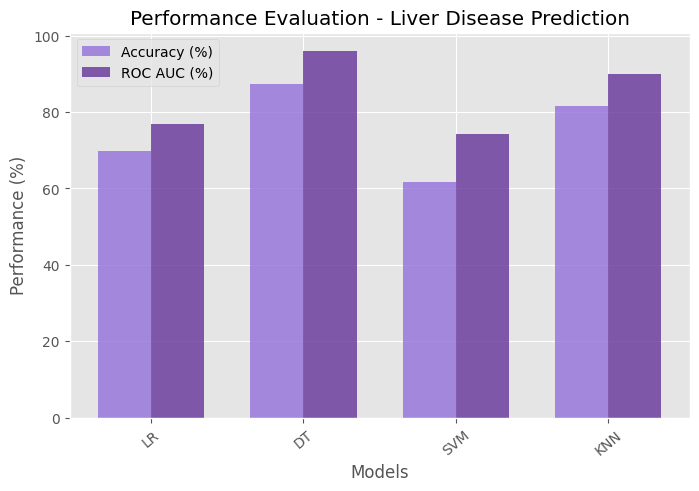

In [184]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Define models with labels
models = [
    {'label': 'LR', 'model': lr},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn}
]

# Initialize lists to store performance metrics
means_roc = []
means_accuracy = []

# Evaluate each model
for m in models:
    model = m['model']
    label = m['label']
    
    # Fit model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    mean_accuracy = 100 * round(accuracy, 4)
    means_accuracy.append(mean_accuracy)
    
    # Calculate ROC AUC
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:,1]
        mean_roc = 100 * round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
    else:
        mean_roc = np.nan  # Use NaN if predict_proba is not available
    
    means_roc.append(mean_roc)
    
    # Display mean accuracy and mean ROC AUC for each model
    print(f"Model: {label}")
    print(f"Mean Accuracy: {mean_accuracy:.2f}%")
    print(f"Mean ROC AUC: {mean_roc:.2f}%")
    print("-" * 30)

# Convert lists to tuples for plotting
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# Create plot
index = np.arange(len(models))
bar_width = 0.35

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot accuracy and ROC AUC as bar charts
rects1 = plt.bar(index, means_accuracy, bar_width, alpha=0.8, color='mediumpurple', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=0.8, color='rebeccapurple', label='ROC AUC (%)')

# Set axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Performance (%)')
ax.set_title('Performance Evaluation - Liver Disease Prediction')

# Set x-ticks and labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([model['label'] for model in models], rotation=40, ha='center')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [190]:
df.sample(5)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
15940,50.0,1,0.8,0.2,148.0,23.0,35.0,6.0,3.0,1.0,1
11861,30.0,1,0.8,0.2,650.0,70.0,138.0,6.6,3.1,0.8,1
14768,35.0,1,2.2,1.0,310.0,119.0,42.0,7.9,4.1,1.0,0
17664,26.0,0,0.7,0.1,162.0,52.0,41.0,5.2,2.5,0.9,0
4052,57.0,0,1.4,0.8,178.0,13.0,26.0,8.0,4.6,1.3,0


In [192]:
from sklearn.linear_model import LogisticRegression
input_data =(26.0,0,0.7,0.1,162.0,52.0,41.0,5.2,2.5,0.9)
#(26.0,0,0.7,0.2,185.0,16.0,22.0,7.3,3.7,1.00)
#100,12,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1) 

'''(14.36,0.09779,0.08129,0.04781,0.1885,0.05766,0.7886,23.56,0.008462,
0.0146,0.02387,0.01315,0.0198,0.0023,15.11,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259
)'''

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
predictions = lr.predict(input_data_reshaped)
print(predictions)
if (predictions == 0):
  print('B')
else:
  print('M')

[1]
M


In [ ]:

import pickle
model = dtc
filename = r'C:\Users\Pranshu Saini\Desktop\disease-prediction-main\docpat\model\liver_prediction.pkl'
pickle.dump(model, open(filename,'wb'))